In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
train=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

**EDA**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [5]:
train.shape

(175000, 17)

In [6]:
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [7]:
train.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [8]:
(train=='?').sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

<Axes: >

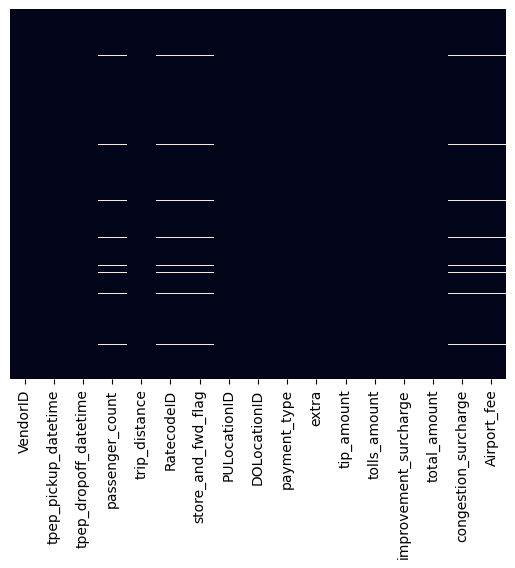

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [10]:
features=train.columns
for i in features:
    print(i,":",train[i].unique())

VendorID : [1 0 2]
tpep_pickup_datetime : ['2023-06-28 17:20:21' '2023-06-29 23:05:01' '2023-06-30 10:19:31' ...
 '2023-06-29 22:58:30' '2023-06-29 11:57:27' '2023-06-30 21:26:43']
tpep_dropoff_datetime : ['2023-06-28 16:34:45' '2023-06-29 22:01:35' '2023-06-30 11:13:10' ...
 '2023-06-30 22:22:22' '2023-06-30 14:04:57' '2023-06-30 22:54:42']
passenger_count : [ 1.  3.  0.  2. nan  4.  6.  5.  8.  9.]
trip_distance : [ 2.14  2.7   1.15 ... 22.34 26.12 15.17]
RatecodeID : [ 1. 99.  3. nan  2.  5.  4.]
store_and_fwd_flag : ['N' nan 'Y']
PULocationID : [120  15 167 128 203 225 214 176 196 138  40 215  55  77   1   3 207   9
 127  31 126 187  17 140  34  25  89 223 239 210 200  73 216 192  80  93
  22 133 110 193 232  27  49  74 119 189 163  16  72 202  84 116   4  35
  13 159 142 253  56 114  20 122  58 141  71  32 160 139 181 246  78 125
 260 169 102 264  76 209 106 149  90 118 151  26 197 113 199  75  95  50
  97  53  18  19 168  29 185 150 183 258 217 164  42   8 226 179 144 252
 124 24

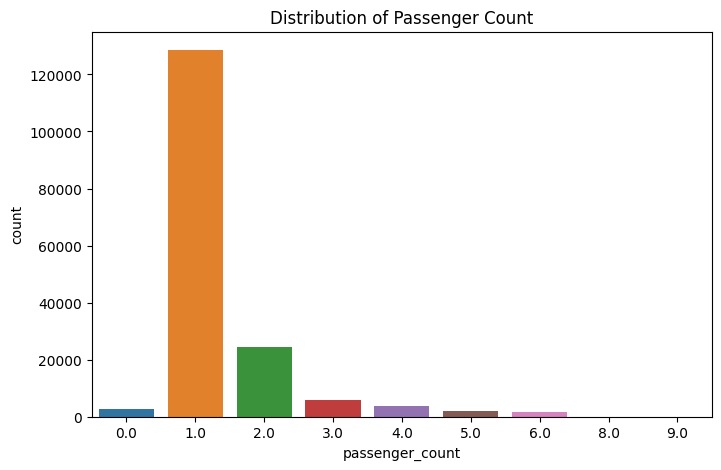

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='passenger_count', data=train)
plt.title('Distribution of Passenger Count')
plt.show()

In [12]:
train['passenger_count'].value_counts()

passenger_count
1.0    128534
2.0     24316
3.0      6018
4.0      3668
0.0      2818
5.0      1970
6.0      1596
8.0         2
9.0         1
Name: count, dtype: int64

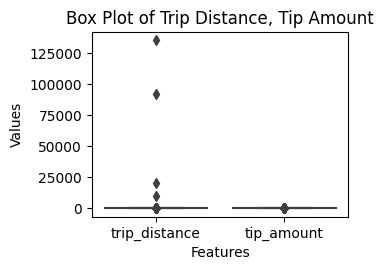

In [13]:
plt.subplot(2, 2, 4)
sns.boxplot(x='variable', y='value', data=pd.melt(train[['trip_distance', 'tip_amount']]))
plt.title('Box Plot of Trip Distance, Tip Amount')
plt.xlabel('Features')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [14]:
# def modify_outliers(train, column):
#     # Calculate the interquartile range (IQR)
#     Q1 = train[column].quantile(0.25)
#     Q3 = train[column].quantile(0.75)
#     IQR = Q3 - Q1
    
#     # Set the threshold as a multiple of the IQR
#     threshold = 1.5  # You can adjust this multiplier as needed
    
#     # Identify and modify outliers
#     outliers = (train[column] < Q1 - threshold * IQR) | (train[column] > Q3 + threshold * IQR)
#     train[column] = np.where(outliers, train[column].median(), train[column])

# # Modify outliers for 'trip_distance'
# modify_outliers(train, 'trip_distance')

# # Modify outliers for 'tip_amount'
# modify_outliers(train, 'tip_amount')

In [15]:
# plt.subplot(2, 2, 4)
# sns.boxplot(x='variable', y='value', data=pd.melt(train[['trip_distance', 'tip_amount']]))
# plt.title('Box Plot of Trip Distance, Tip Amount')
# plt.xlabel('Features')
# plt.ylabel('Values')

# plt.tight_layout()
# plt.show()

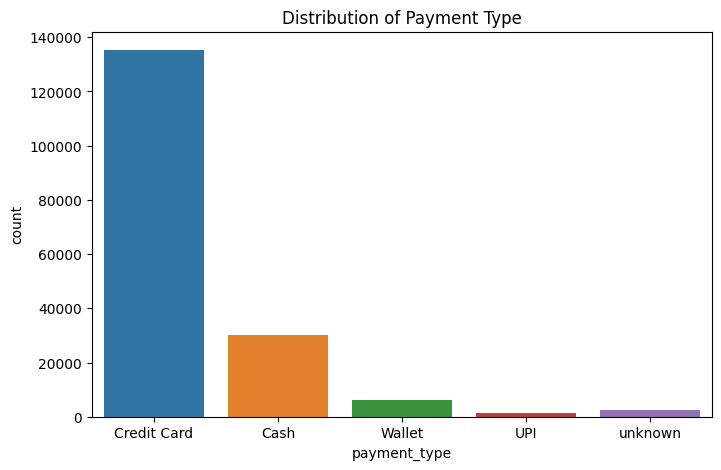

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='payment_type', data=train)
plt.title('Distribution of Payment Type')
plt.show()

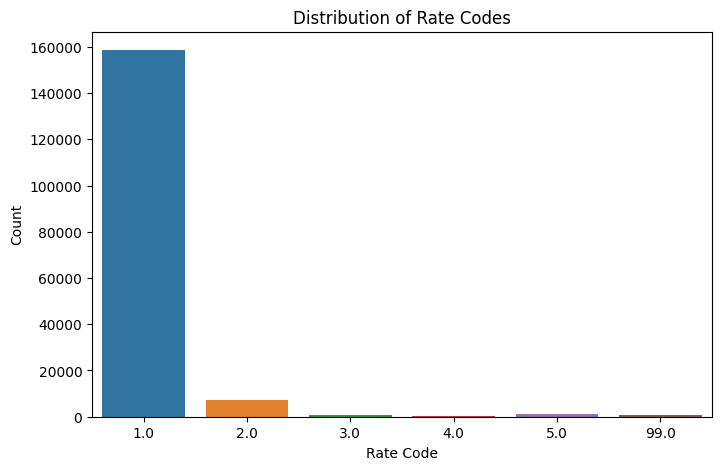

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='RatecodeID', data=train)
plt.title('Distribution of Rate Codes')
plt.xlabel('Rate Code')
plt.ylabel('Count')
plt.show()

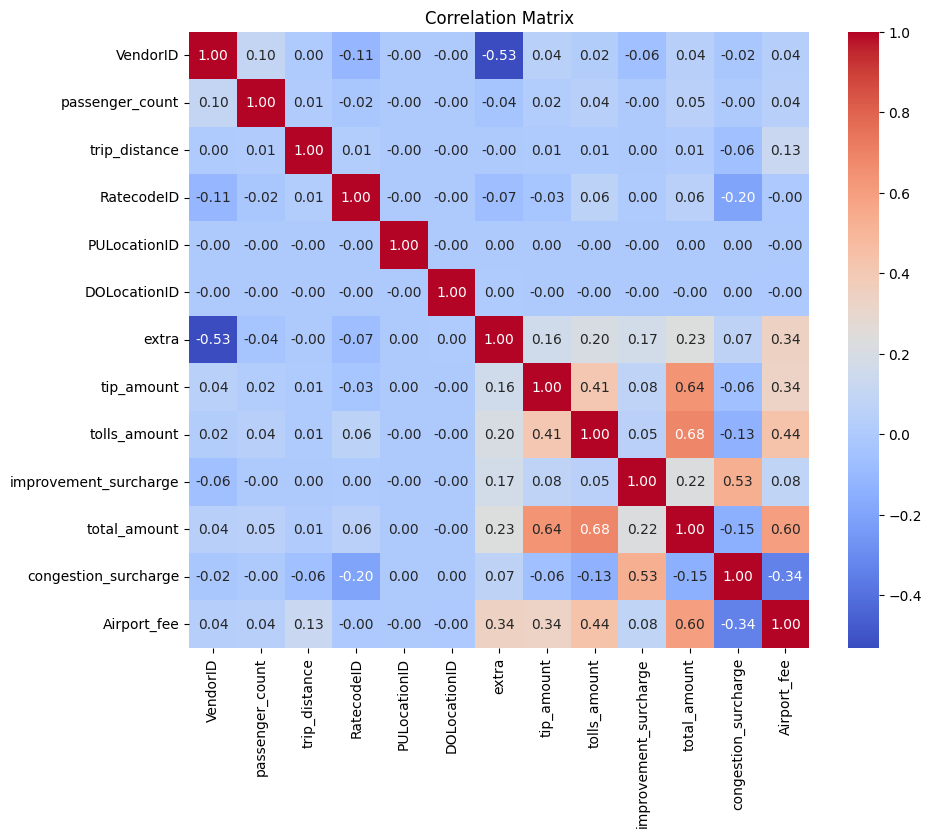

In [18]:
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

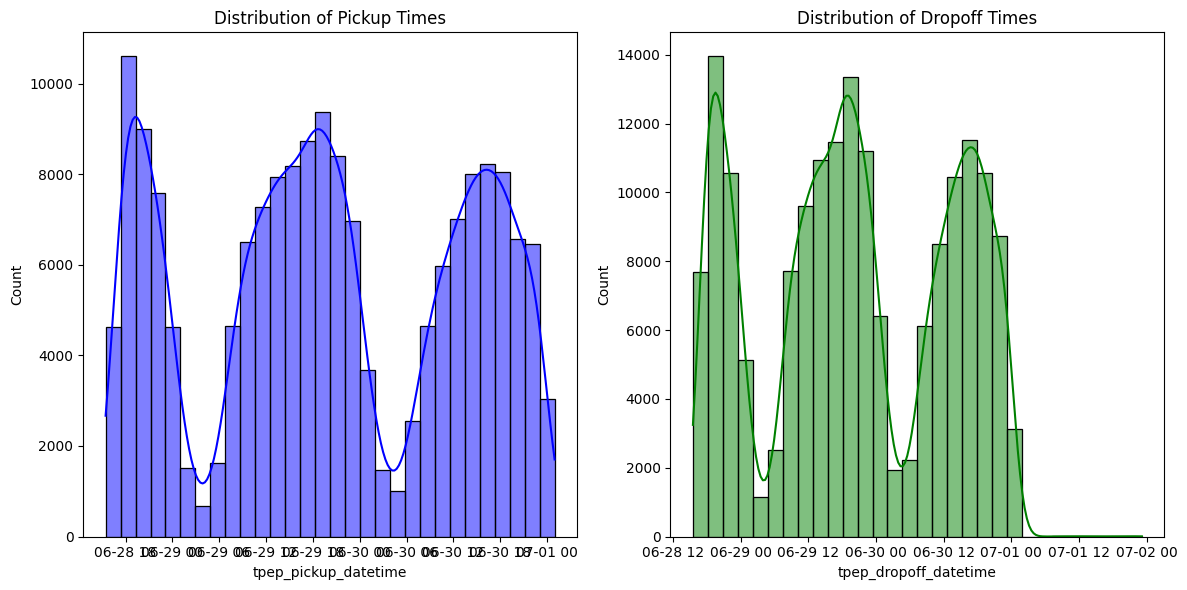

In [19]:
train['tpep_pickup_datetime'] = pd.to_datetime(train['tpep_pickup_datetime'])
train['tpep_dropoff_datetime'] = pd.to_datetime(train['tpep_dropoff_datetime'])

# Create subplots for pickup and dropoff time distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train['tpep_pickup_datetime'], kde=True, bins=30, color='blue')
plt.title('Distribution of Pickup Times')

plt.subplot(1, 2, 2)
sns.histplot(train['tpep_dropoff_datetime'], kde=True, bins=30, color='green')
plt.title('Distribution of Dropoff Times')

plt.tight_layout()
plt.show()

In [20]:
train['duration of ride']=((train['tpep_dropoff_datetime']-train['tpep_pickup_datetime']).dt.total_seconds()/60).abs()
train['duration of ride']

0         45.600000
1         63.433333
2         53.650000
3         56.866667
4         18.833333
            ...    
174995    28.583333
174996    61.400000
174997    70.033333
174998    38.366667
174999    87.983333
Name: duration of ride, Length: 175000, dtype: float64

**preprocessing on train data**

In [21]:
train['passenger_count']=train['passenger_count'].fillna(train['passenger_count'].median())
train['RatecodeID']=train['RatecodeID'].fillna(train['RatecodeID'].median())
train['congestion_surcharge']=train['congestion_surcharge'].fillna(train['congestion_surcharge'].mean())
train['Airport_fee']=train['Airport_fee'].fillna(train['Airport_fee'].mean())
train['store_and_fwd_flag']=train['store_and_fwd_flag'].fillna(train['store_and_fwd_flag'].mode()[0])

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
train_onehot=ohe.fit_transform(train[['store_and_fwd_flag','payment_type']]).toarray()
train_onehot.shape

(175000, 7)

In [23]:
train_new=np.hstack((train[['VendorID','passenger_count', 'trip_distance','RatecodeID','PULocationID', 'DOLocationID','extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge','congestion_surcharge', 'Airport_fee', 'duration of ride']].values,train_onehot))

In [24]:
train_target=train[['total_amount']].values

In [25]:
train_new.shape,train_target.shape

((175000, 20), (175000, 1))

In [26]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
sd.fit_transform(train_new)

array([[ 6.09559617e-01, -3.93180568e-01, -7.61052972e-03, ...,
        -8.28139017e-02, -1.89670691e-01, -1.16239223e-01],
       [-1.63458001e+00, -3.93180568e-01, -6.19270025e-03, ...,
        -8.28139017e-02, -1.89670691e-01, -1.16239223e-01],
       [ 6.09559617e-01, -3.93180568e-01, -1.01170497e-02, ...,
        -8.28139017e-02, -1.89670691e-01, -1.16239223e-01],
       ...,
       [-1.63458001e+00, -3.93180568e-01, -6.95225175e-03, ...,
        -8.28139017e-02, -1.89670691e-01, -1.16239223e-01],
       [ 6.09559617e-01, -3.93180568e-01, -1.10370516e-03, ...,
        -8.28139017e-02, -1.89670691e-01, -1.16239223e-01],
       [ 6.09559617e-01, -3.93180568e-01, -1.04715071e-02, ...,
        -8.28139017e-02, -1.89670691e-01, -1.16239223e-01]])

<Axes: >

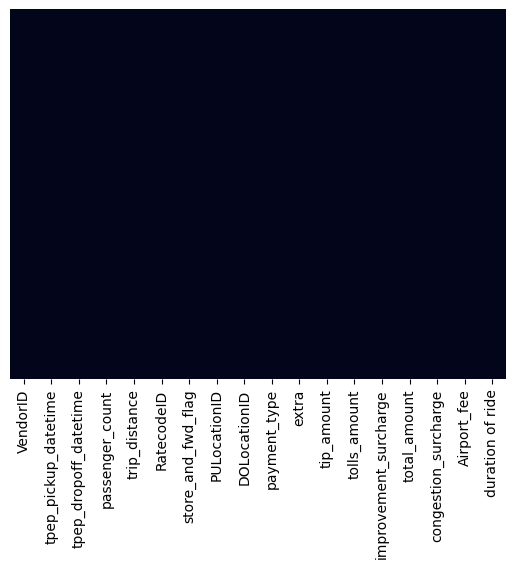

In [27]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

 **EDA on test data**

In [28]:
test.shape

(50000, 16)

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        48221 non-null  float64
 4   trip_distance          50000 non-null  float64
 5   RatecodeID             48221 non-null  float64
 6   store_and_fwd_flag     48221 non-null  object 
 7   PULocationID           50000 non-null  int64  
 8   DOLocationID           50000 non-null  int64  
 9   payment_type           50000 non-null  object 
 10  extra                  50000 non-null  float64
 11  tip_amount             50000 non-null  float64
 12  tolls_amount           50000 non-null  float64
 13  improvement_surcharge  50000 non-null  float64
 14  congestion_surcharge   48221 non-null  float64
 15  Ai

In [30]:
test.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
dtype: int64

In [31]:
(test=='?').sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
Airport_fee              0
dtype: int64

<Axes: >

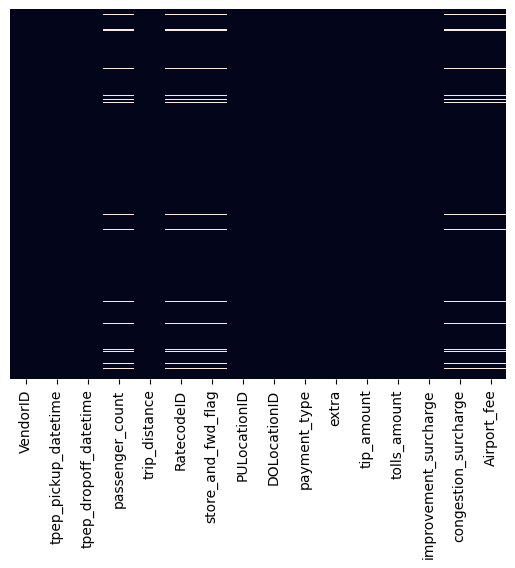

In [32]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

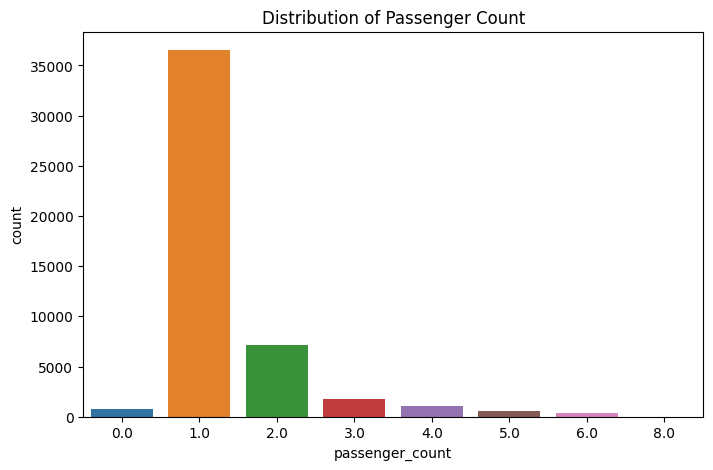

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x='passenger_count', data=test)
plt.title('Distribution of Passenger Count')
plt.show()

In [34]:
# median_passenger_count = test['passenger_count'].median()
# test['passenger_count'].replace({0: median_passenger_count}, inplace=True)

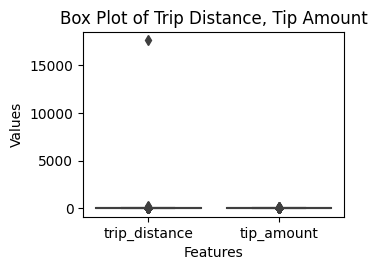

In [35]:
plt.subplot(2, 2, 4)
sns.boxplot(x='variable', y='value', data=pd.melt(test[['trip_distance', 'tip_amount' ]]))
plt.title('Box Plot of Trip Distance, Tip Amount')
plt.xlabel('Features')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [36]:
# def modify_outliers(test, column):
#     # Calculate the interquartile range (IQR)
#     Q1 = test[column].quantile(0.25)
#     Q3 = test[column].quantile(0.75)
#     IQR = Q3 - Q1
    
#     # Set the threshold as a multiple of the IQR
#     threshold = 1.5  # You can adjust this multiplier as needed
    
#     # Identify and modify outliers
#     outliers = (test[column] < Q1 - threshold * IQR) | (test[column] > Q3 + threshold * IQR)
#     test[column] = np.where(outliers, test[column].median(), test[column])

# # Modify outliers for 'trip_distance' in the 'test' DataFrame
# modify_outliers(test, 'trip_distance')

# # Modify outliers for 'tip_amount' in the 'test' DataFrame
# modify_outliers(test, 'tip_amount')

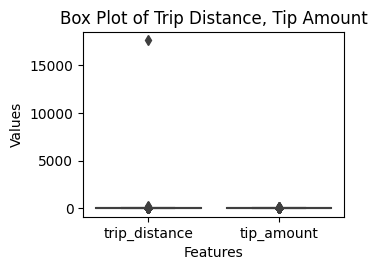

In [37]:
plt.subplot(2, 2, 4)
sns.boxplot(x='variable', y='value', data=pd.melt(test[['trip_distance', 'tip_amount' ]]))
plt.title('Box Plot of Trip Distance, Tip Amount')
plt.xlabel('Features')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

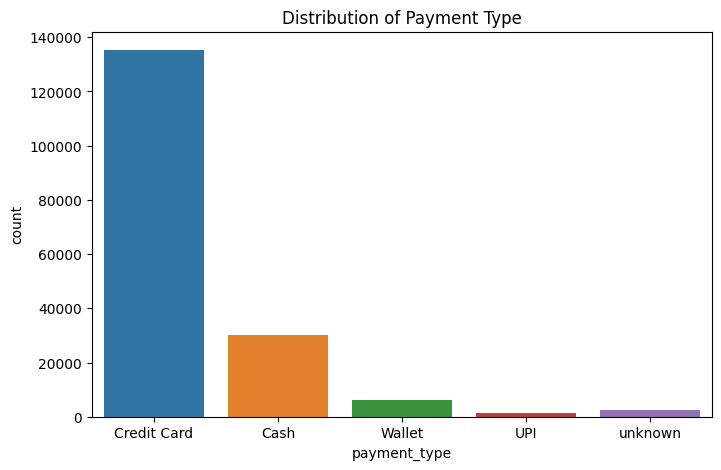

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(x='payment_type', data=train)
plt.title('Distribution of Payment Type')
plt.show()

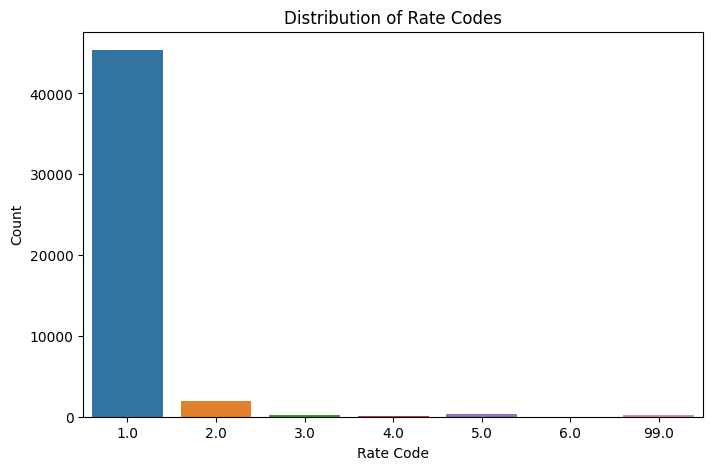

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(x='RatecodeID', data=test)
plt.title('Distribution of Rate Codes')
plt.xlabel('Rate Code')
plt.ylabel('Count')
plt.show()

In [40]:
# train['RatecodeID'].replace({99.0: 1.0}, inplace=True)

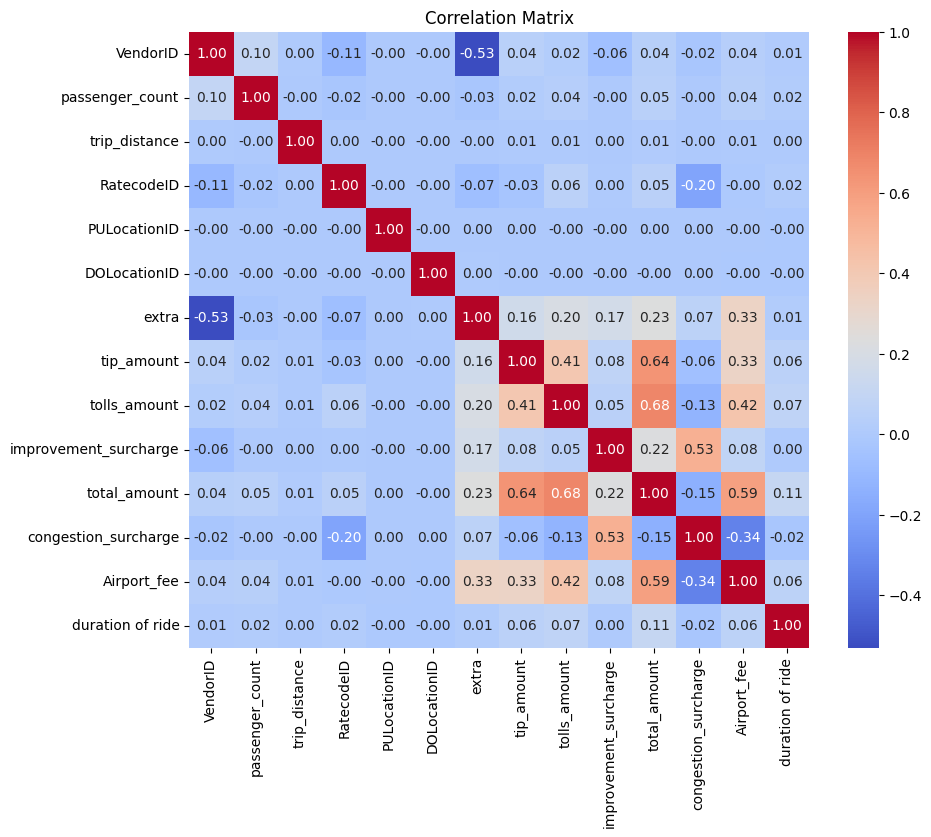

In [41]:
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

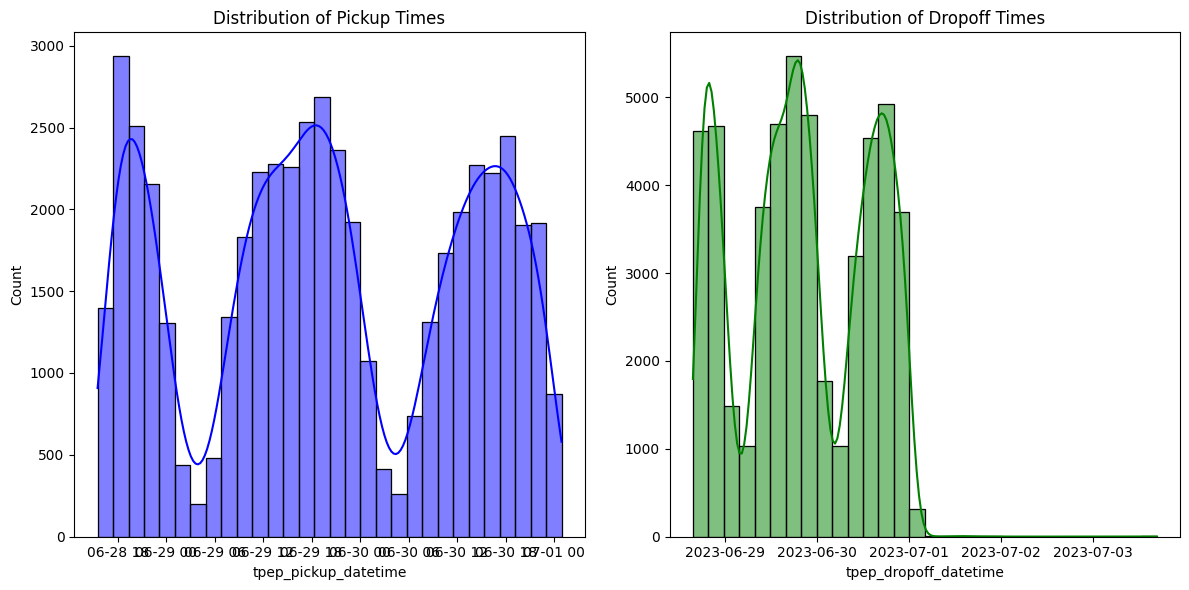

In [42]:
test['tpep_pickup_datetime'] = pd.to_datetime(test['tpep_pickup_datetime'])
test['tpep_dropoff_datetime'] = pd.to_datetime(test['tpep_dropoff_datetime'])

# Create subplots for pickup and dropoff time distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(test['tpep_pickup_datetime'], kde=True, bins=30, color='blue')
plt.title('Distribution of Pickup Times')

plt.subplot(1, 2, 2)
sns.histplot(test['tpep_dropoff_datetime'], kde=True, bins=30, color='green')
plt.title('Distribution of Dropoff Times')

plt.tight_layout()
plt.show()

In [43]:
test['duration of ride']=((test['tpep_dropoff_datetime']-test['tpep_pickup_datetime']).dt.total_seconds()/60).abs()
test['duration of ride']

0         4.000000
1         8.500000
2        66.733333
3        12.450000
4        28.383333
           ...    
49995    48.616667
49996    14.750000
49997    39.116667
49998    26.750000
49999    49.983333
Name: duration of ride, Length: 50000, dtype: float64

**preprocessing of test **

In [44]:
test['passenger_count']=test['passenger_count'].fillna(test['passenger_count'].median())
test['RatecodeID']=test['RatecodeID'].fillna(test['RatecodeID'].median())
test['congestion_surcharge']=test['congestion_surcharge'].fillna(test['congestion_surcharge'].mean())
test['Airport_fee']=test['Airport_fee'].fillna(test['Airport_fee'].mean())
test['store_and_fwd_flag']=test['store_and_fwd_flag'].fillna(test['store_and_fwd_flag'].mode()[0])

<Axes: >

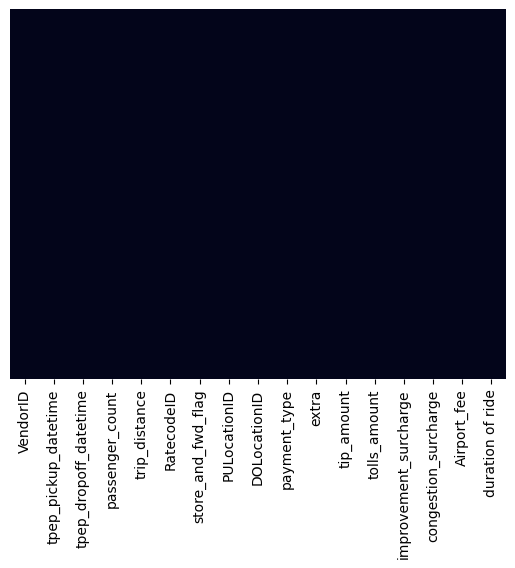

In [45]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [46]:
test['duration of ride']=((test['tpep_dropoff_datetime']-test['tpep_pickup_datetime']).dt.total_seconds()/60).abs()
test['duration of ride']

0         4.000000
1         8.500000
2        66.733333
3        12.450000
4        28.383333
           ...    
49995    48.616667
49996    14.750000
49997    39.116667
49998    26.750000
49999    49.983333
Name: duration of ride, Length: 50000, dtype: float64

In [47]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
test_onehot=ohe.fit_transform(test[['store_and_fwd_flag','payment_type']]).toarray()
test_onehot.shape

(50000, 7)

In [48]:
test_new=np.hstack((test[['VendorID','passenger_count', 'trip_distance','RatecodeID','PULocationID', 'DOLocationID','extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge','congestion_surcharge', 'Airport_fee', 'duration of ride']].values,test_onehot))

In [49]:
sd.fit_transform(test_new)

array([[ 0.60668535, -0.39871321,  0.01204422, ..., -0.07936898,
        -0.19207457, -0.11610028],
       [ 0.60668535, -0.39871321, -0.02405094, ..., -0.07936898,
        -0.19207457, -0.11610028],
       [ 0.60668535, -0.39871321, -0.03861565, ..., -0.07936898,
        -0.19207457, -0.11610028],
       ...,
       [ 0.60668535, -0.39871321, -0.02633063, ..., -0.07936898,
        -0.19207457, -0.11610028],
       [-1.64263006, -0.39871321,  0.01774345, ..., -0.07936898,
        -0.19207457, -0.11610028],
       [ 0.60668535, -0.39871321, -0.03405626, ..., -0.07936898,
        -0.19207457, -0.11610028]])

# model training start 


In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_new,train_target,test_size=.20,random_state=42)

In [51]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((140000, 20), (35000, 20), (140000, 1), (35000, 1))

**DummyRegressor**

In [52]:
from sklearn.dummy import DummyRegressor
dr=DummyRegressor(strategy='mean')
dr.fit(x_train,y_train)
y_pred=dr.predict(x_test)
dr.score(y_test,y_pred)

1.0

**LinearRegression**

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)
from sklearn.metrics import r2_score 
r2_score(y_test,y_pred1)

0.7232709449755836

**PolynomialFeatures**

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
degree=2
polyreg=Pipeline([('poly',PolynomialFeatures(degree)),('lr',LinearRegression())])
polyreg.fit(x_train,y_train)
ypred=polyreg.predict(x_test)
r2_score(y_test,ypred)

0.8915165693240854

Hyperparameter tuning of Polynomial model 

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'poly__degree':[2,3]
}
plcv=GridSearchCV(polyreg,param_grid=param_grid,scoring='r2',cv=2)
plcv.fit(x_train,y_train)
ypred1=plcv.best_estimator_.predict(x_test)
print(r2_score(y_test,ypred1))
print(plcv.best_params_)

0.8915165693240854
{'poly__degree': 2}


**KNeighborsRegressor**

In [56]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred2=knn.predict(x_test)
r2_score(y_test,pred2)

0.7250740746313196

Hyperparameter tuning of KNeighborsRegressor

In [57]:
param2={'n_neighbors': [3, 5, 7, 9, 11] } 
knn.cv=GridSearchCV(knn, param_grid=param2,scoring='r2',  cv=5) 
knn.cv.fit(x_train, y_train )
predkn=knn.cv.best_estimator_.predict(x_test) 
print(r2_score(y_test, predkn))
print(knn.cv.best_params_)

0.7298427068274873
{'n_neighbors': 3}


 **SVM**

In [58]:
# y_train1 = np.ravel(y_train)
# y_test1 = np.ravel(y_test)

# from sklearn.svm import SVR
# svr=SVR(kernel='linear')
# svr.fit(x_train,y_train1)
# pred=svr.predict(x_test)
# r2_score(y_test1,pred)

**DecisionTreeRegressor**

In [59]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)
ypre=regressor.predict(x_test)
r2_score(y_test,ypre)

0.8952748421096646

Hyperparameter tuning of DecisionTreeRegressor

In [60]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}


dr_cv = RandomizedSearchCV(
    regressor,
    param_distributions=param_dist,
    n_iter=10,  
    scoring='r2', 
    cv=2, 
    n_jobs=-1, 
    random_state=42
)
dr_cv.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/si

RandomizedSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='r2')

In [61]:
preddv=dr_cv.best_estimator_.predict(x_test) 
print(r2_score(y_test, preddv))
print(dr_cv.best_params_)

0.9345969563118504
{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20}


**BaggingRegressor**

In [62]:
from sklearn.ensemble import BaggingRegressor 
bag_model= BaggingRegressor(dr_cv.best_estimator_ ,n_estimators=5, random_state=42)
bag_model.fit(x_train ,y_train)
yp=bag_model.predict(x_test)
r2_score(y_test,yp)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.950154288546686

Hyperparameter tuning of BaggingRegressor

In [63]:
from scipy.stats import randint, uniform
param_gri = {
    'n_estimators': randint(10, 201),  
    'max_samples': uniform(0.1, 0.9),  
    'max_features': uniform(0.1, 0.9),
}
bag_model.cv = RandomizedSearchCV(bag_model, param_distributions=param_gri, n_iter=10, cv=5, scoring='r2', n_jobs=-1)
bag_model.cv.fit(x_train, y_train)
y_pr = bag_model.cv.predict(x_test)
print(r2_score(y_test, y_pr))
print(bag_model.cv.best_params_)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

0.9550159939142323
{'max_features': 0.9416936918688991, 'max_samples': 0.3807918728459848, 'n_estimators': 48}


**xgboost**

In [64]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(x_train, y_train)
y_pred4 = model.predict(x_test)
r2_score(y_test, y_pred4) 

0.9546695561786303

Hyperparameter tuning of xgb

In [65]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
model.cv = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, scoring='r2', n_jobs=-1)
model.cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='r2')

In [66]:
y_prd = model.cv.predict(x_test)
print(r2_score(y_test, y_prd))
print(model.cv.best_params_)

0.9537046825151647
{'subsample': 0.9, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


In [67]:
output=model.predict(test_new).ravel()
out=pd.DataFrame({'ID':np.arange(1,len(output)+1),'total_amount':output})

In [68]:
out.to_csv('submission.csv',index=False)